In [1]:
import pandas as pd
import sklearn

In [2]:
import numpy as np

In [3]:
from sklearn.datasets import load_boston
df=load_boston()

In [4]:
df.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [7]:
boston=pd.DataFrame(df.data,columns=df.feature_names)
boston.head()#gives the first 20 if (20) lines only is nothing inside() then only 5

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
 boston['MEDV']=df.target #to get the target value of the house and add its column in table however medv is just a name

In [9]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
boston.isnull() #to check if any thing is null value

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [12]:
from sklearn.model_selection import train_test_split #is a function to divide dataset into training and testing data

X=boston.drop('MEDV',axis=1) #to deleting the MEDV column from X as it is the target that we dont need in X axis=1 mean delete a column and axis=0 is deleting row
Y=boston['MEDV'] #to assign MEDV to a new variable

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.15,random_state=5) #test size determines howmuch data do you want in test set like 15 out of 100 here and random state means out of 5 random numbers choose a test set

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(430, 13)
(76, 13)
(430,)
(76,)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [14]:
lin_model=LinearRegression()
lin_model.fit( X_train , Y_train)

LinearRegression()

In [15]:
Y_train_predict=lin_model.predict(X_train) #to get the prdicted y or y hat by passing training x in linear regression
rmse1=(np.sqrt(mean_squared_error(Y_train,Y_train_predict))) #to pass the calculated value and the original value and get the estimated error by root mean square method
print("the product performance for training set")
print("rmse is {}".format(rmse1))
print("\n")
#now we will perform it on the test set
Y_test_predict=lin_model.predict(X_test) #to get the prdicted y or y hat by passing training x in linear regression
rmse2=(np.sqrt(mean_squared_error(Y_test,Y_test_predict))) #to pass the calculated value and the original value and get the estimated error by root mean square method
print("the product performance for testing set")
print("rmse is {}".format(rmse2))

the product performance for training set
rmse is 4.710901797319796


the product performance for testing set
rmse is 4.6875435279029345


In [16]:
import matplotlib.pyplot as plt #matplot is used for data visualization that is for getting graphs(EXTRA NOT IN PROJECT REQUIREMENT)

Text(0, 0.5, 'predicted')

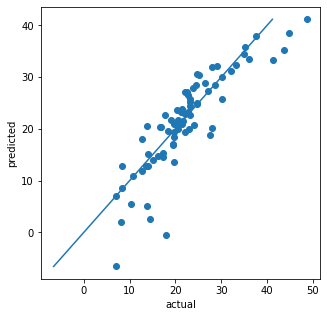

In [17]:
plt.figure(figsize=(5,5))
plt.scatter(Y_test,Y_test_predict)
plt.plot([min(Y_test_predict),max(Y_test_predict)],[min(Y_test_predict),max(Y_test_predict)])
plt.xlabel('actual')
plt.ylabel('predicted')